# K-means clustering algorithm 

Creating a dataset of my own by sampling from 3 different gaussian distribution and implementing my own clustering algorithm to cluster them.

In [10]:
# Q1.a)

import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.spatial import distance

mean1 = [0,0]
mean2 = [3,0]
mean3 = [0,3]
cov = [[1,0],[0,1]]

g1 = np.random.multivariate_normal(mean1, cov, 500)
g2 = np.random.multivariate_normal(mean2, cov, 500)
g3 = np.random.multivariate_normal(mean3, cov, 500)


dataset = []
for i in range(1,501):
    rand = random.random()
    if rand >=0 and rand < 0.2:
        dataset.append(g1[random.randint(0,499)])
    if rand >=0.2 and rand <0.7:
        dataset.append(g2[random.randint(0,499)])
    if rand >=0.7 and rand <= 1:
        dataset.append(g3[random.randint(0,499)])

dataset = np.array(dataset)
k=[2,3,4,5]
data_points_3 = []
data_points_5 = []

obj_all = []
for x in k:
    c = []
    mu = []
    obj_list = []

    # initialize mu for all clusters
    for z in range(0,x):
        mu.append(dataset[random.randint(0, 499)])


    # initialize cluster assignment for all data points arbitrarily
    for b in range(0,500):
        c.append(random.randint(0, x))

    for i in range(1,21):

        obj = 0

        # for each data point, find the nearest centroid and assign to that cluster
        for j in range(0,500):
            dist = []
            for m in range(0,x):
                dist.append((distance.euclidean(dataset[j],mu[m])**2))
            c[j] = dist.index(min(dist))

        # calculate the objective function
        for m in range(0,500):
            for e in range(0,x):
                if c[m] == e:
                    ind = 1
                else:
                    ind = 0
                obj = obj + (ind * (distance.euclidean(dataset[m],mu[e]))**2)
        obj_list.append(obj)

        # for the assigned clusters, find the new centroid
        for l in range(0,x):
            data_points = dataset[np.where(np.array(c)==l)]
            mu[l] = np.sum(data_points,axis=0)/np.size(data_points,0)
            if x == 3 and i == 20:
                data_points_3.append(data_points)
            if x == 5 and i == 20:
                data_points_5.append(data_points)

    obj_all.append(obj_list)

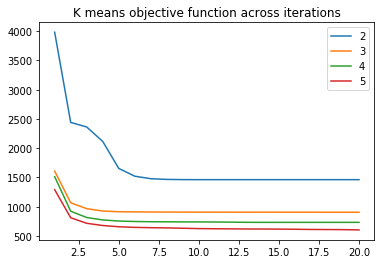

In [11]:
k=2
for obj in obj_all:
    plt.plot(range(1,21),obj,label=k)
    k=k+1
plt.legend()
plt.title("K means objective function across iterations")
plt.show()

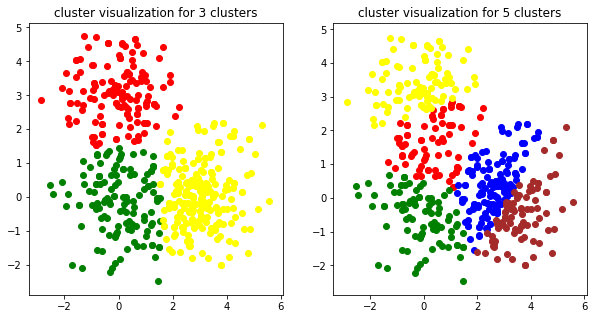

In [8]:
fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(data_points_3[0][:,0],data_points_3[0][:,1],c='red')
ax1.scatter(data_points_3[1][:,0],data_points_3[1][:,1],c='green')
ax1.scatter(data_points_3[2][:,0],data_points_3[2][:,1],c='yellow')
ax1.set_title("cluster visualization for 3 clusters")

ax2.scatter(data_points_5[0][:,0],data_points_5[0][:,1],c='red')
ax2.scatter(data_points_5[1][:,0],data_points_5[1][:,1],c='green')
ax2.scatter(data_points_5[2][:,0],data_points_5[2][:,1],c='yellow')
ax2.scatter(data_points_5[3][:,0],data_points_5[3][:,1],c='blue')
ax2.scatter(data_points_5[4][:,0],data_points_5[4][:,1],c='brown')
ax2.set_title("cluster visualization for 5 clusters")
plt.show()